# Scatter plots

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import datetime as dt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_exploded = df.explode('job_skills')
""" df_skills_salary = df_skills.groupby('job_skills')['salary_year_avg'].median(numeric_only=True).reset_index(name = 'median_salary')
df_skills_count = df_skills.groupby('job_skills').size().reset_index(name = 'skill_count')
df_skills = df_skills_salary.merge(df_skills_count, on = 'job_skills')
df_skills = df_skills.sort_values(by = 'skill_count', ascending=False).head(10)
display(df_skills) """

# Easier to do the following using the 'agg' function:   
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

skill_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(10)



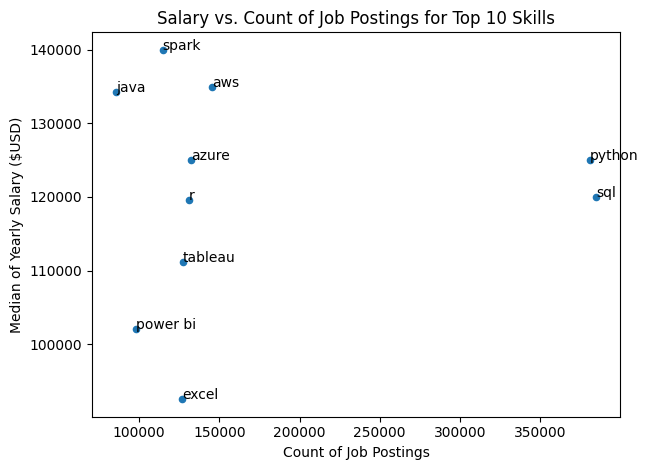

In [42]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median of Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()